/tmp/ipykernel_21753/65366686.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(unique_dec_unsuccess_values))


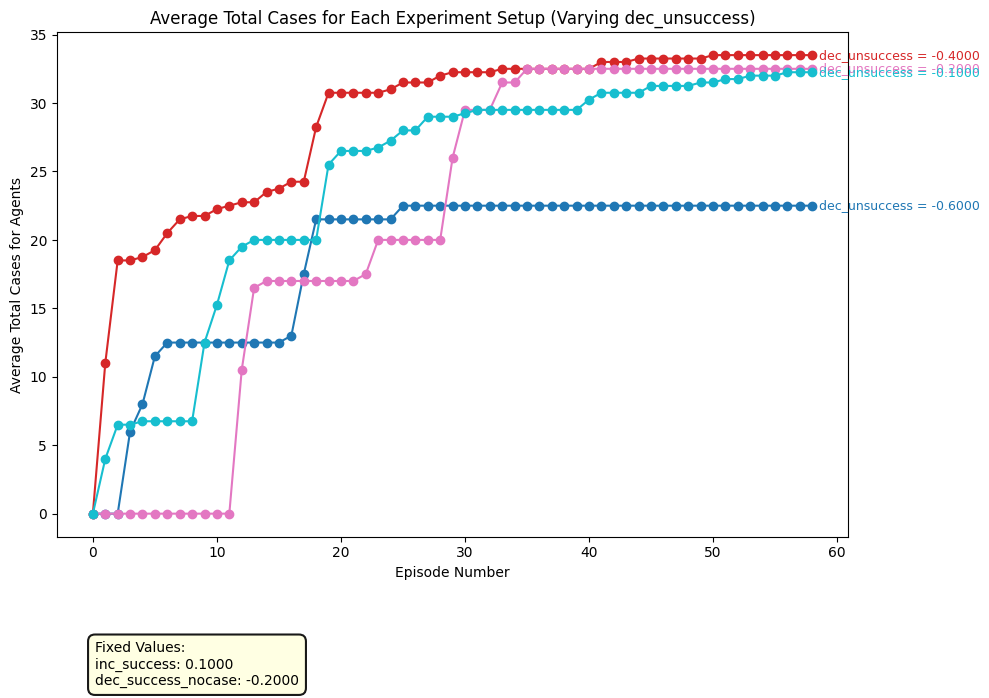

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Folder path containing CSV files
folder_path = './'

# Load all CSV files in the specified folder
file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load all the data and concatenate them
all_data_frames = [pd.read_csv(file_path) for file_path in file_paths]
combined_data = pd.concat(all_data_frames, ignore_index=True)

# Group by dec_unsuccess to average data for the same experiment setup
grouped_data = combined_data.groupby(['dec_unsuccess', 'eps']).mean().reset_index()

# Calculate the average total cases across all agents
grouped_data['average_total_case'] = grouped_data[['total_case_agent_0', 'total_case_agent_1']].mean(axis=1)

# Plot the average total cases for each unique dec_unsuccess setup
plt.figure(figsize=(10, 6))

# Plot each unique dec_unsuccess setup with a different color
unique_dec_unsuccess_values = grouped_data['dec_unsuccess'].unique()
color_map = plt.cm.get_cmap('tab10', len(unique_dec_unsuccess_values))

for i, dec_unsuccess_value in enumerate(unique_dec_unsuccess_values):
    sub_data = grouped_data[grouped_data['dec_unsuccess'] == dec_unsuccess_value]
    plt.plot(sub_data['eps'], sub_data['average_total_case'], color=color_map(i), label=f'dec_unsuccess = {dec_unsuccess_value:.4f}', marker='o')

    # Annotate each line with its dec_unsuccess value at the end of the line
    end_eps = sub_data['eps'].max()
    end_total_case = sub_data[sub_data['eps'] == end_eps]['average_total_case'].values[0]
    plt.text(end_eps + 0.5, end_total_case, f'dec_unsuccess = {dec_unsuccess_value:.4f}', fontsize=9, color=color_map(i), va='center')

# Additional title and axis labels
plt.title("Average Total Cases for Each Experiment Setup (Varying dec_unsuccess)")
plt.xlabel("Episode Number")
plt.ylabel("Average Total Cases for Agents")

# Add the legend below the graph to show the fixed values of other variables
fixed_values_text = (
    f"Fixed Values:\n"
    f"inc_success: {combined_data['inc_success'].iloc[0]:.4f}\n"
    f"dec_success_nocase: {combined_data['dec_success_nocase'].iloc[0]:.4f}"
)
props = dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightyellow', alpha=0.9, linewidth=1.5)
plt.figtext(0.1, -0.15, fixed_values_text, fontsize=10, ha='left', bbox=props)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
